In [7]:
import FinanceDataReader as fdr
import pandas as pd

In [40]:
# 삼성전자, 2017~현재 일별 시세
df = fdr.DataReader('005930', '2017', '2021')
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568
2020-12-29,78800,78900,77300,78300,30339449,-0.005083
2020-12-30,77400,81300,77300,81000,29417421,0.034483


<AxesSubplot:xlabel='Date'>

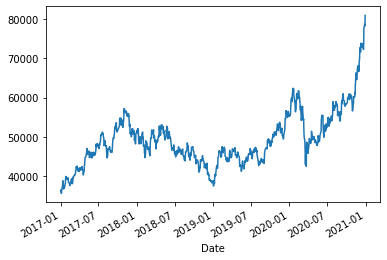

In [5]:
df['Close'].plot()

In [11]:
#df_krx = fdr.StockListing('KRX')
df_krx = pd.read_csv('krx.csv')
df_krx.shape

(7181, 10)

In [14]:
df_krx[['Symbol', 'Name']].tail()

,Symbol,Name
7176,000547,흥국화재2우B
7177,000545,흥국화재우
7178,003280,흥아해운
7179,037440,희림
7180,238490,힘스


In [27]:
item_name = '하이브'
df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()[0]

'352820'

In [34]:
def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code

In [36]:
item_code_by_item_name('셀트리온')

'068270'

In [37]:
# fdr.DataReader(item_code_by_item_name('LG화학'))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-04-25,20621,20621,17563,18489,3094940,NaN
2001-04-26,17918,18416,17492,17636,1197840,-0.046136
2001-04-27,17280,18204,17066,18062,854340,0.024155
2001-04-30,17706,18275,17706,18204,803230,0.007862
2001-05-02,18345,18843,17990,18489,851580,0.015656
...,...,...,...,...,...,...
2021-08-30,787000,789000,767000,770000,252845,-0.016603
2021-08-31,770000,777000,752000,758000,577128,-0.015584
2021-09-01,763000,766000,721000,721000,906907,-0.048813


In [45]:
def find_item_list(item_name, year=2021):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집한다.
    """
    try:
        df_day = fdr.DataReader(item_code_by_item_name(item_name), str(year))
        return df_day
    except:
        print('no such name')
    

In [59]:
stock_daily = find_item_list('NAVER', 2019)
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787
2019-01-03,120000,125000,119000,122000,525020,0.033898
2019-01-04,123500,126000,122500,125500,520785,0.028689
2019-01-07,128000,132500,127000,131500,502619,0.047809
2019-01-08,132000,134000,129000,130000,376127,-0.011407
...,...,...,...,...,...,...
2021-08-30,425500,429000,423000,428000,399336,0.019048
2021-08-31,430000,439500,427000,439000,768823,0.025701
2021-09-01,442000,448500,436500,445000,655075,0.013667


<AxesSubplot:xlabel='Date'>

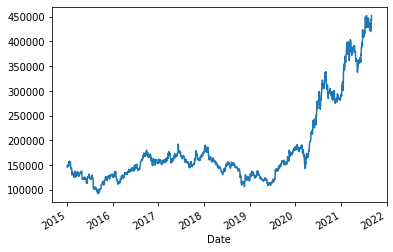

In [54]:
stock_daily['Close'].plot()

<AxesSubplot:xlabel='Date'>

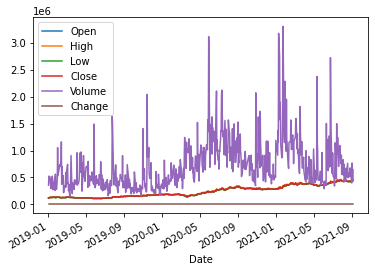

In [60]:
stock_daily.plot()

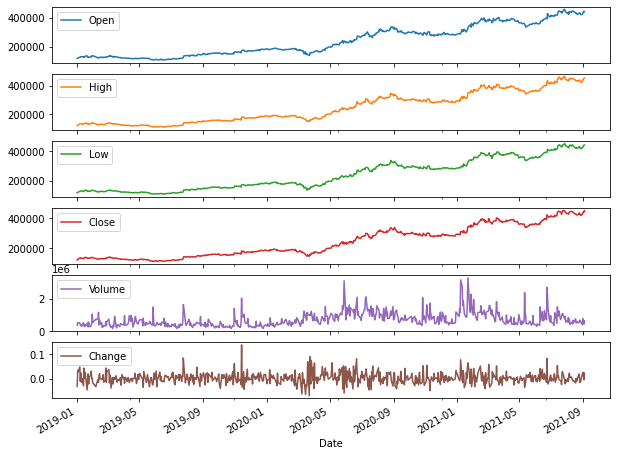

In [61]:
g = stock_daily.plot(subplots=True, figsize=(10,8))

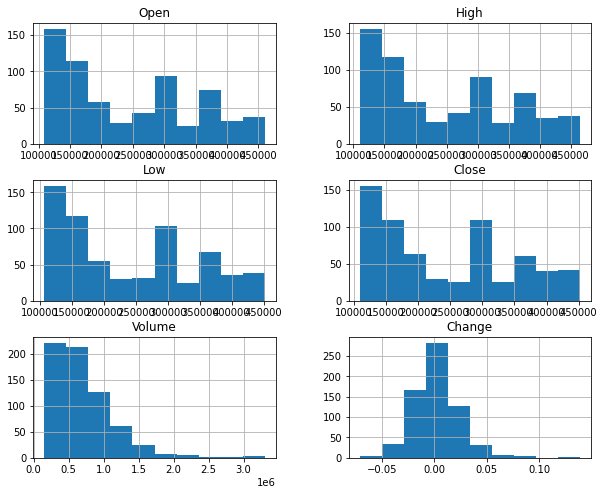

In [63]:
h = stock_daily.hist(figsize=(10,8), bins=10)

<AxesSubplot:xlabel='Date'>

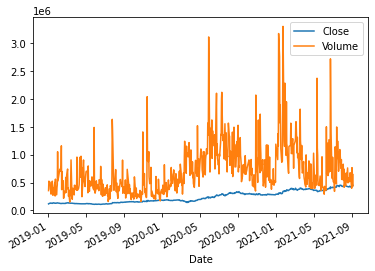

In [64]:
stock_daily[['Close', 'Volume']].plot()

<AxesSubplot:xlabel='Date'>

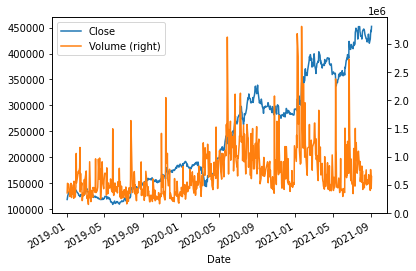

In [65]:
# 2축 그래프
stock_daily[['Close', 'Volume']].plot(secondary_y='Volume')

In [69]:
# 과학적 표기법
1e6

1000000.0

In [70]:
format(1e6, ',')

'1,000,000.0'